<a href="https://colab.research.google.com/github/devmj092/Income-limit-notebook/blob/main/ML_Project_2_F_MJ.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd

In [4]:
import numpy as np

In [5]:
import matplotlib.pyplot as plt

In [6]:
import seaborn as sns

In [7]:
from sklearn.preprocessing import OneHotEncoder

In [39]:
from sklearn.preprocessing import OrdinalEncoder

In [40]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score

In [50]:
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import HistGradientBoostingClassifier

In [8]:
from google.colab import drive
drive. mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [9]:
!pip install openpyxl

In [10]:
import openpyxl

In [11]:
path = "/content/drive/MyDrive/P2-data.xlsx"
dataread = pd.read_excel(path)

#EDA

In [12]:
dataread

,ID,age,gender,education,class,education_institute,marital_status,race,is_hispanic,employment_commitment,...,country_of_birth_mother,migration_code_change_in_msa,migration_prev_sunbelt,migration_code_move_within_reg,migration_code_change_in_reg,residence_1_year_ago,old_residence_reg,old_residence_state,importance_of_record,income_above_limit
0,ID_TZ0000,79,Female,High school graduate,NaN,NaN,Widowed,White,All other,Not in labor force,...,US,?,?,?,?,NaN,NaN,NaN,1779.74,Below limit
1,ID_TZ0001,65,Female,High school graduate,NaN,NaN,Widowed,White,All other,Children or Armed Forces,...,US,unchanged,NaN,unchanged,unchanged,Same,NaN,NaN,2366.75,Below limit
2,ID_TZ0002,21,Male,12th grade no diploma,Federal government,NaN,Never married,Black,All other,Children or Armed Forces,...,US,unchanged,NaN,unchanged,unchanged,Same,NaN,NaN,1693.42,Below limit
3,ID_TZ0003,2,Female,Children,NaN,NaN,Never married,Asian or Pacific Islander,All other,Children or Armed Forces,...,India,unchanged,NaN,unchanged,unchanged,Same,NaN,NaN,1380.27,Below limit
4,ID_TZ0004,70,Male,High school graduate,NaN,NaN,Married-civilian spouse present,White,All other,Not in labor force,...,US,?,?,?,?,NaN,NaN,NaN,1580.79,Below limit
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209494,ID_TZ99995,16,Female,7th and 8th grade,NaN,High school,Never married,White,All other,Not in labor force,...,US,?,?,?,?,NaN,NaN,NaN,2170.60,Below limit
209495,ID_TZ99996,78,Male,Bachelors degree(BA AB BS),NaN,NaN,Married-civilian spouse present,White,All other,Not in labor force,...,Canada,?,?,?,?,NaN,NaN,NaN,1029.57,Below limit
209496,ID_TZ99997,8,Female,Children,NaN,NaN,Never married,White,All other,Children or Armed Forces,...,US,?,?,?,?,NaN,NaN,NaN,791.61,Below limit
209497,ID_TZ99998,26,Female,Some college but no degree,Private,NaN,Married-civilian spouse present,White,All other,Children or Armed Forces,...,US,unchanged,NaN,unchanged,unchanged,Same,NaN,NaN,3530.26,Below limit


In [13]:
dataread.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209499 entries, 0 to 209498
Data columns (total 43 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   ID                              209499 non-null  object 
 1   age                             209499 non-null  int64  
 2   gender                          209499 non-null  object 
 3   education                       209499 non-null  object 
 4   class                           104254 non-null  object 
 5   education_institute             13302 non-null   object 
 6   marital_status                  209499 non-null  object 
 7   race                            209499 non-null  object 
 8   is_hispanic                     208617 non-null  object 
 9   employment_commitment           209499 non-null  object 
 10  unemployment_reason             6520 non-null    object 
 11  employment_stat                 209499 non-null  int64  
 12  wage_per_hour   

In [14]:
dataread.describe(include='all')

,ID,age,gender,education,class,education_institute,marital_status,race,is_hispanic,employment_commitment,...,country_of_birth_mother,migration_code_change_in_msa,migration_prev_sunbelt,migration_code_move_within_reg,migration_code_change_in_reg,residence_1_year_ago,old_residence_reg,old_residence_state,importance_of_record,income_above_limit
count,209499,209499.000000,209499,209499,104254,13302,209499,209499,208617,209499,...,209499,207911,121047,207911,207911,103215,16351,16351,209499.000000,209499
unique,209499,NaN,2,17,8,2,7,5,9,8,...,43,9,3,9,8,2,5,50,NaN,2
top,ID_TZ0000,NaN,Female,High school graduate,Private,High school,Never married,White,All other,Children or Armed Forces,...,US,?,?,?,?,Same,South,California,NaN,Below limit
freq,1,NaN,108784,50627,75617,7247,90723,175709,180404,129789,...,168233,104696,104696,104696,104696,86864,5056,1849,NaN,196501
mean,NaN,34.518728,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1740.888324,NaN
std,NaN,22.306738,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,995.559557,NaN
min,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,37.870000,NaN
25%,NaN,15.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1061.290000,NaN
50%,NaN,33.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1617.040000,NaN
75%,NaN,50.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2185.480000,NaN


#Data Visualization

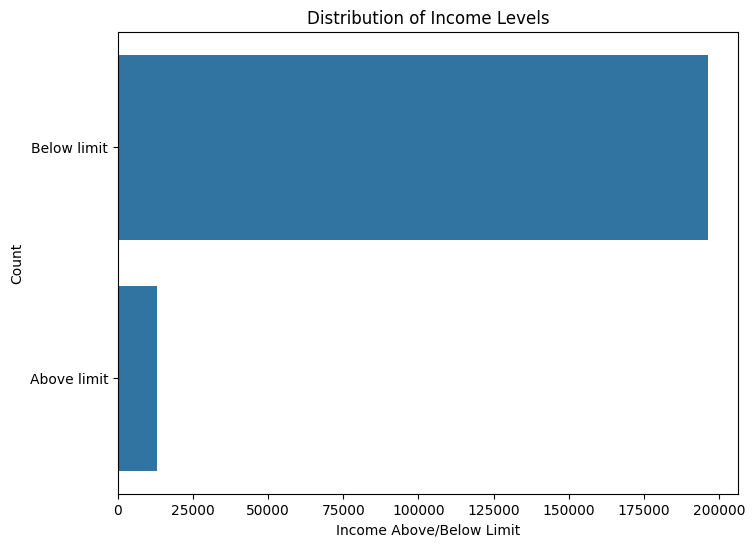

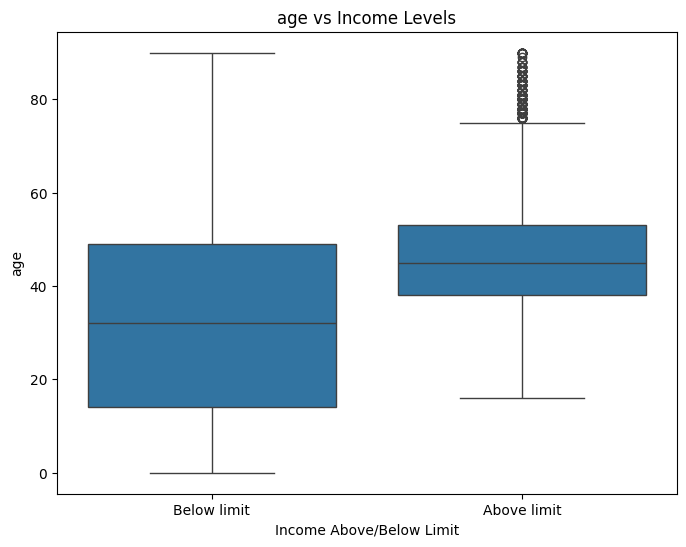

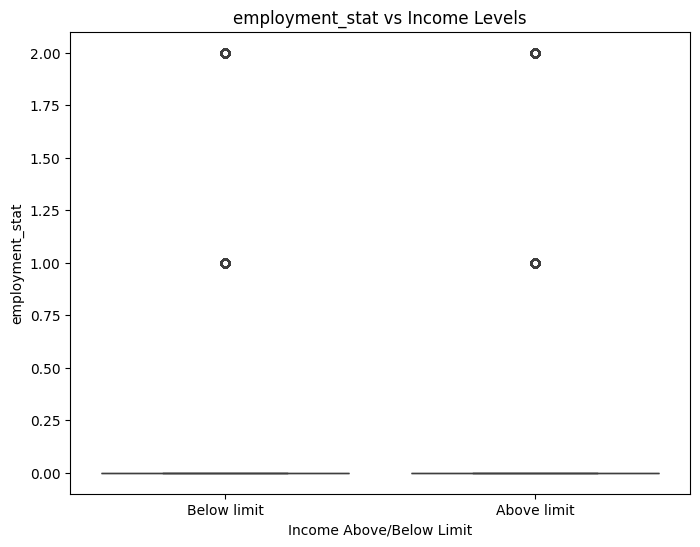

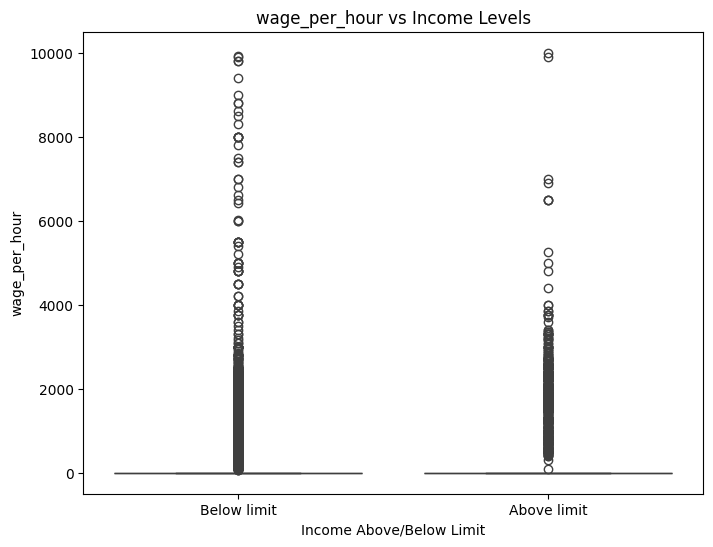

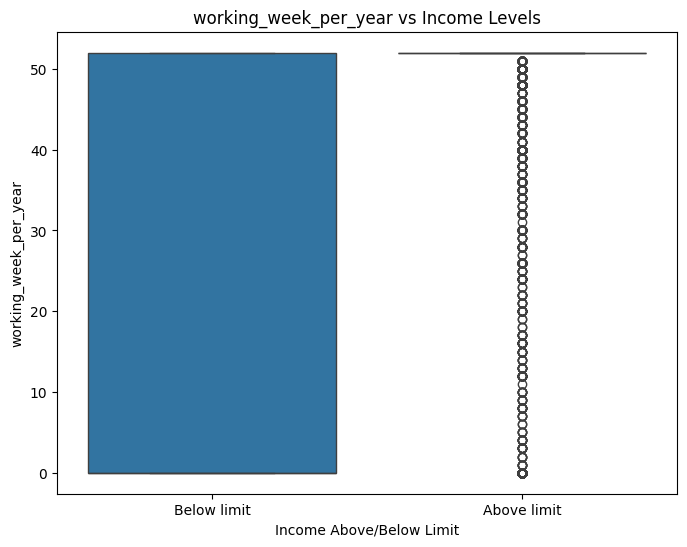

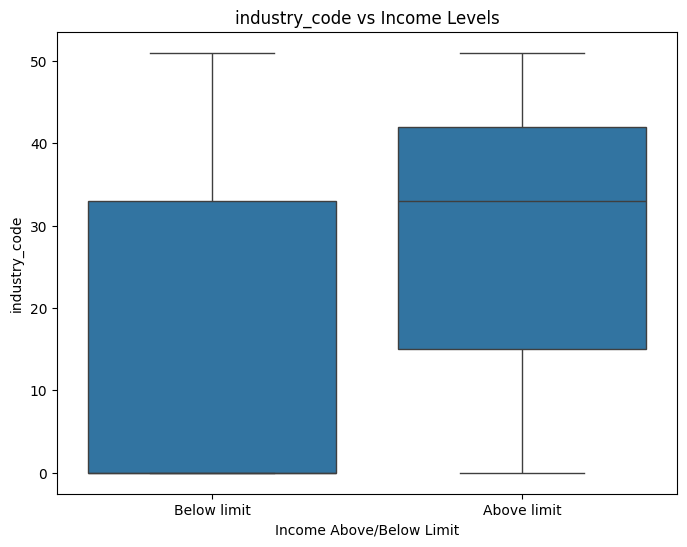

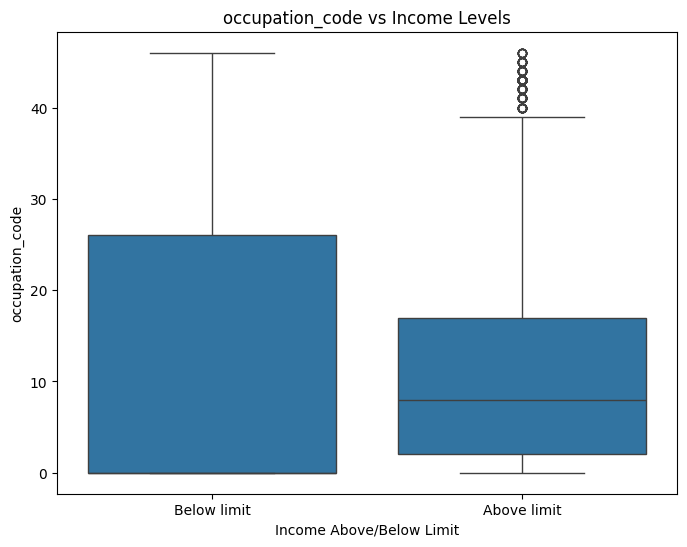

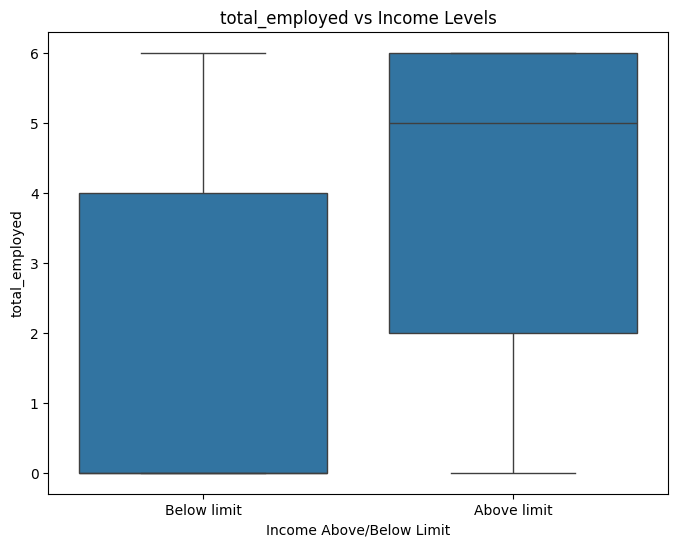

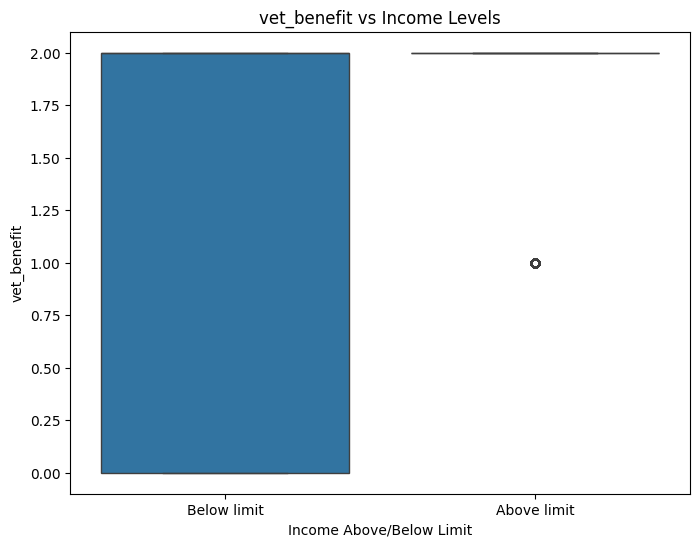

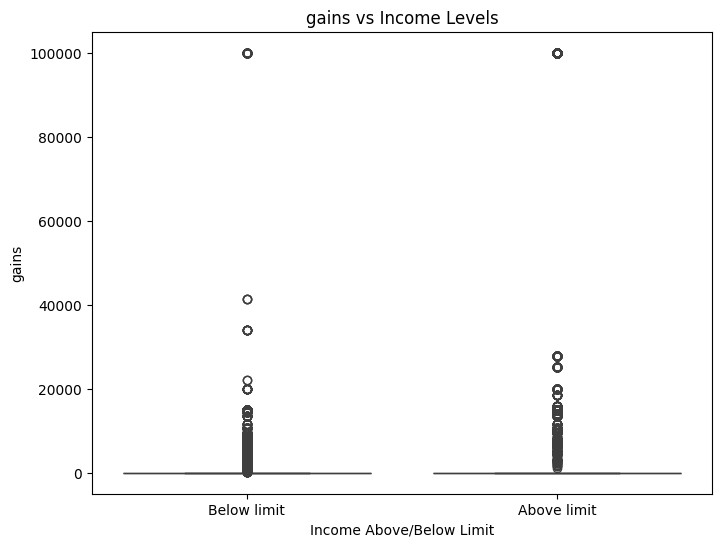

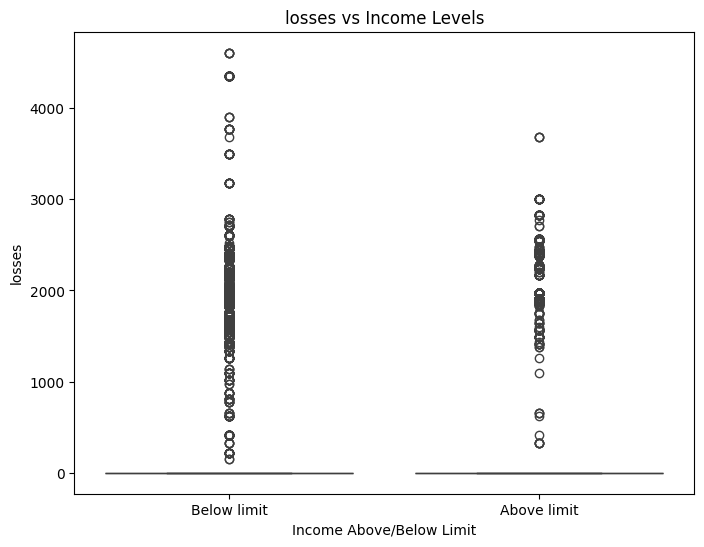

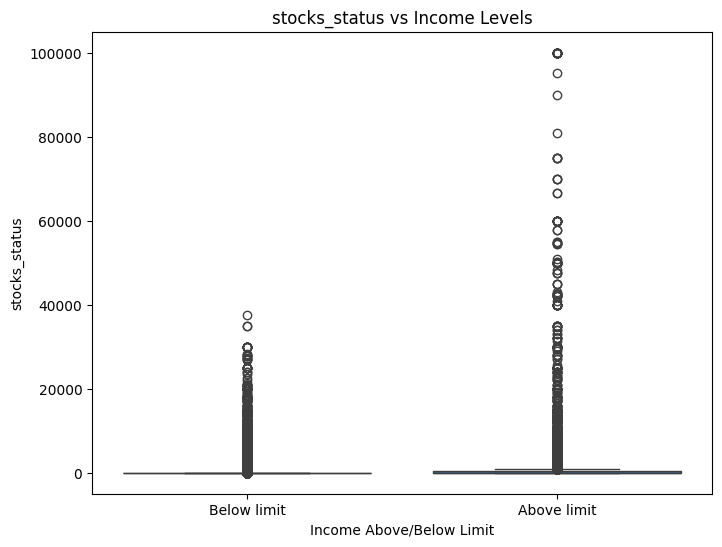

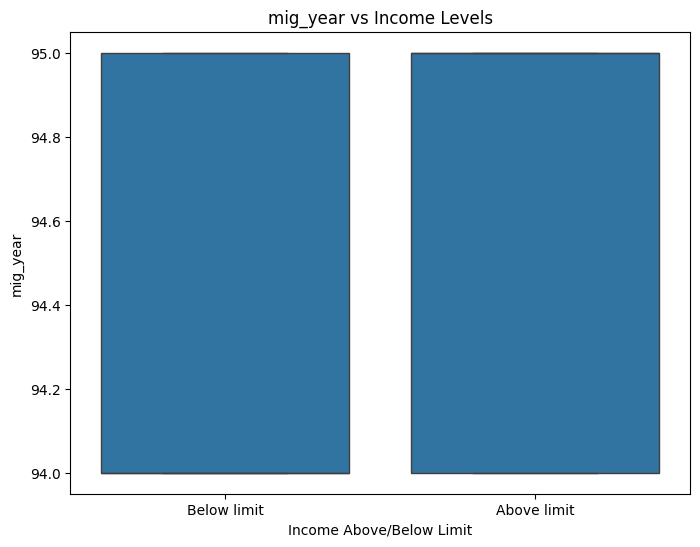

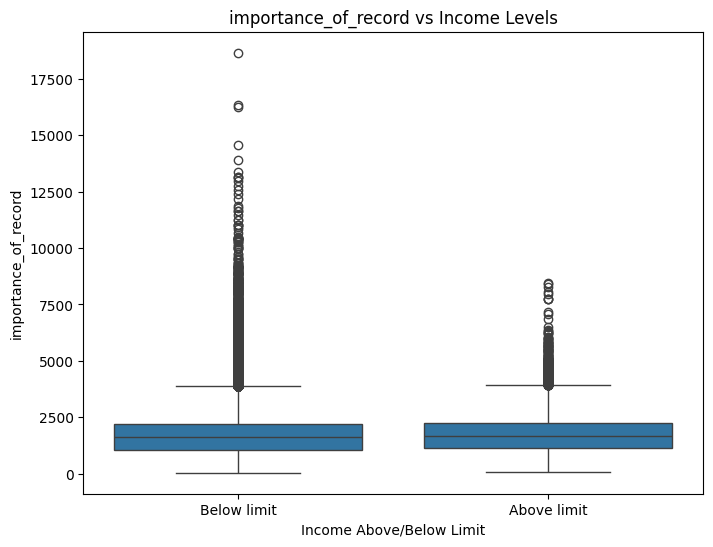

In [15]:
# Load the dataset
data = dataread

# Step 1: Identify the target variable
target_variable = 'income_above_limit'

# Step 2: Explore the distribution of the target variable
plt.figure(figsize=(8, 6))
sns.countplot(data[target_variable])
plt.title("Distribution of Income Levels")
plt.xlabel("Income Above/Below Limit")
plt.ylabel("Count")
plt.show()

# Step 3: Visualize relationships with numerical variables
numerical_variables = data.select_dtypes(include=np.number).columns.tolist()


for var in numerical_variables:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x=data[target_variable], y=data[var])
    plt.title(f"{var} vs Income Levels")
    plt.xlabel("Income Above/Below Limit")
    plt.ylabel(var)
    plt.show()

<Axes: xlabel='income_above_limit', ylabel='education'>

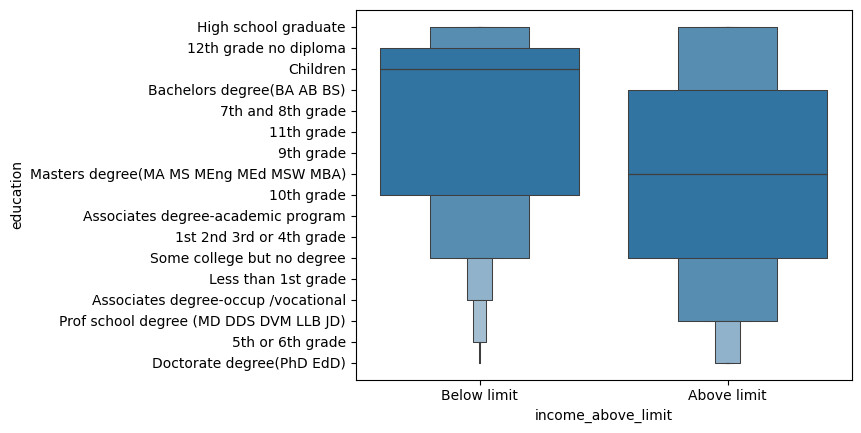

In [16]:
sns.boxenplot(data=data, x="income_above_limit", y="education")

<Axes: xlabel='income_above_limit', ylabel='gender'>

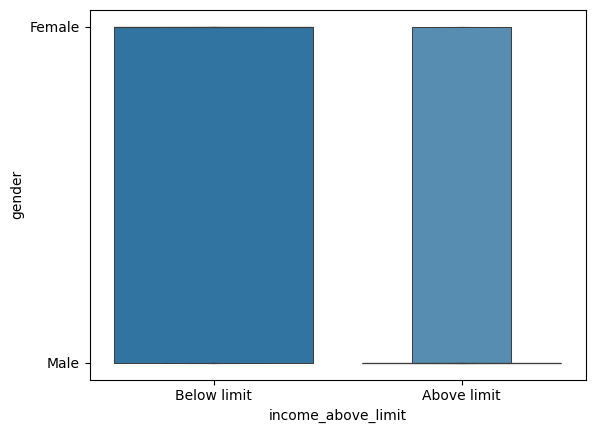

In [17]:
sns.boxenplot(data=data, x="income_above_limit", y="gender")

<Axes: xlabel='income_above_limit', ylabel='race'>

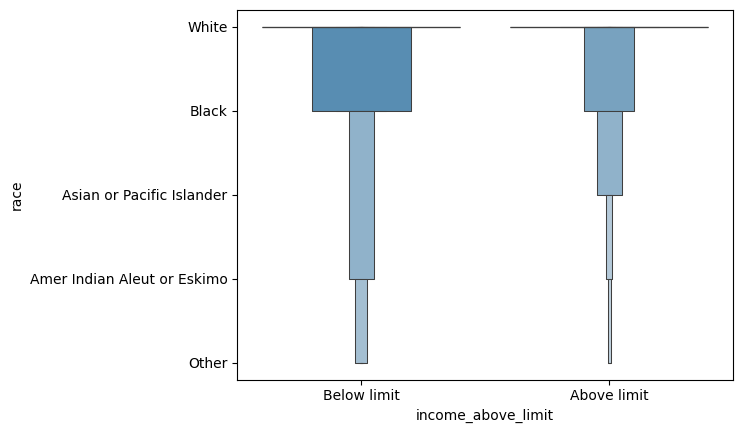

In [18]:
sns.boxenplot(data=data, x="income_above_limit", y="race")

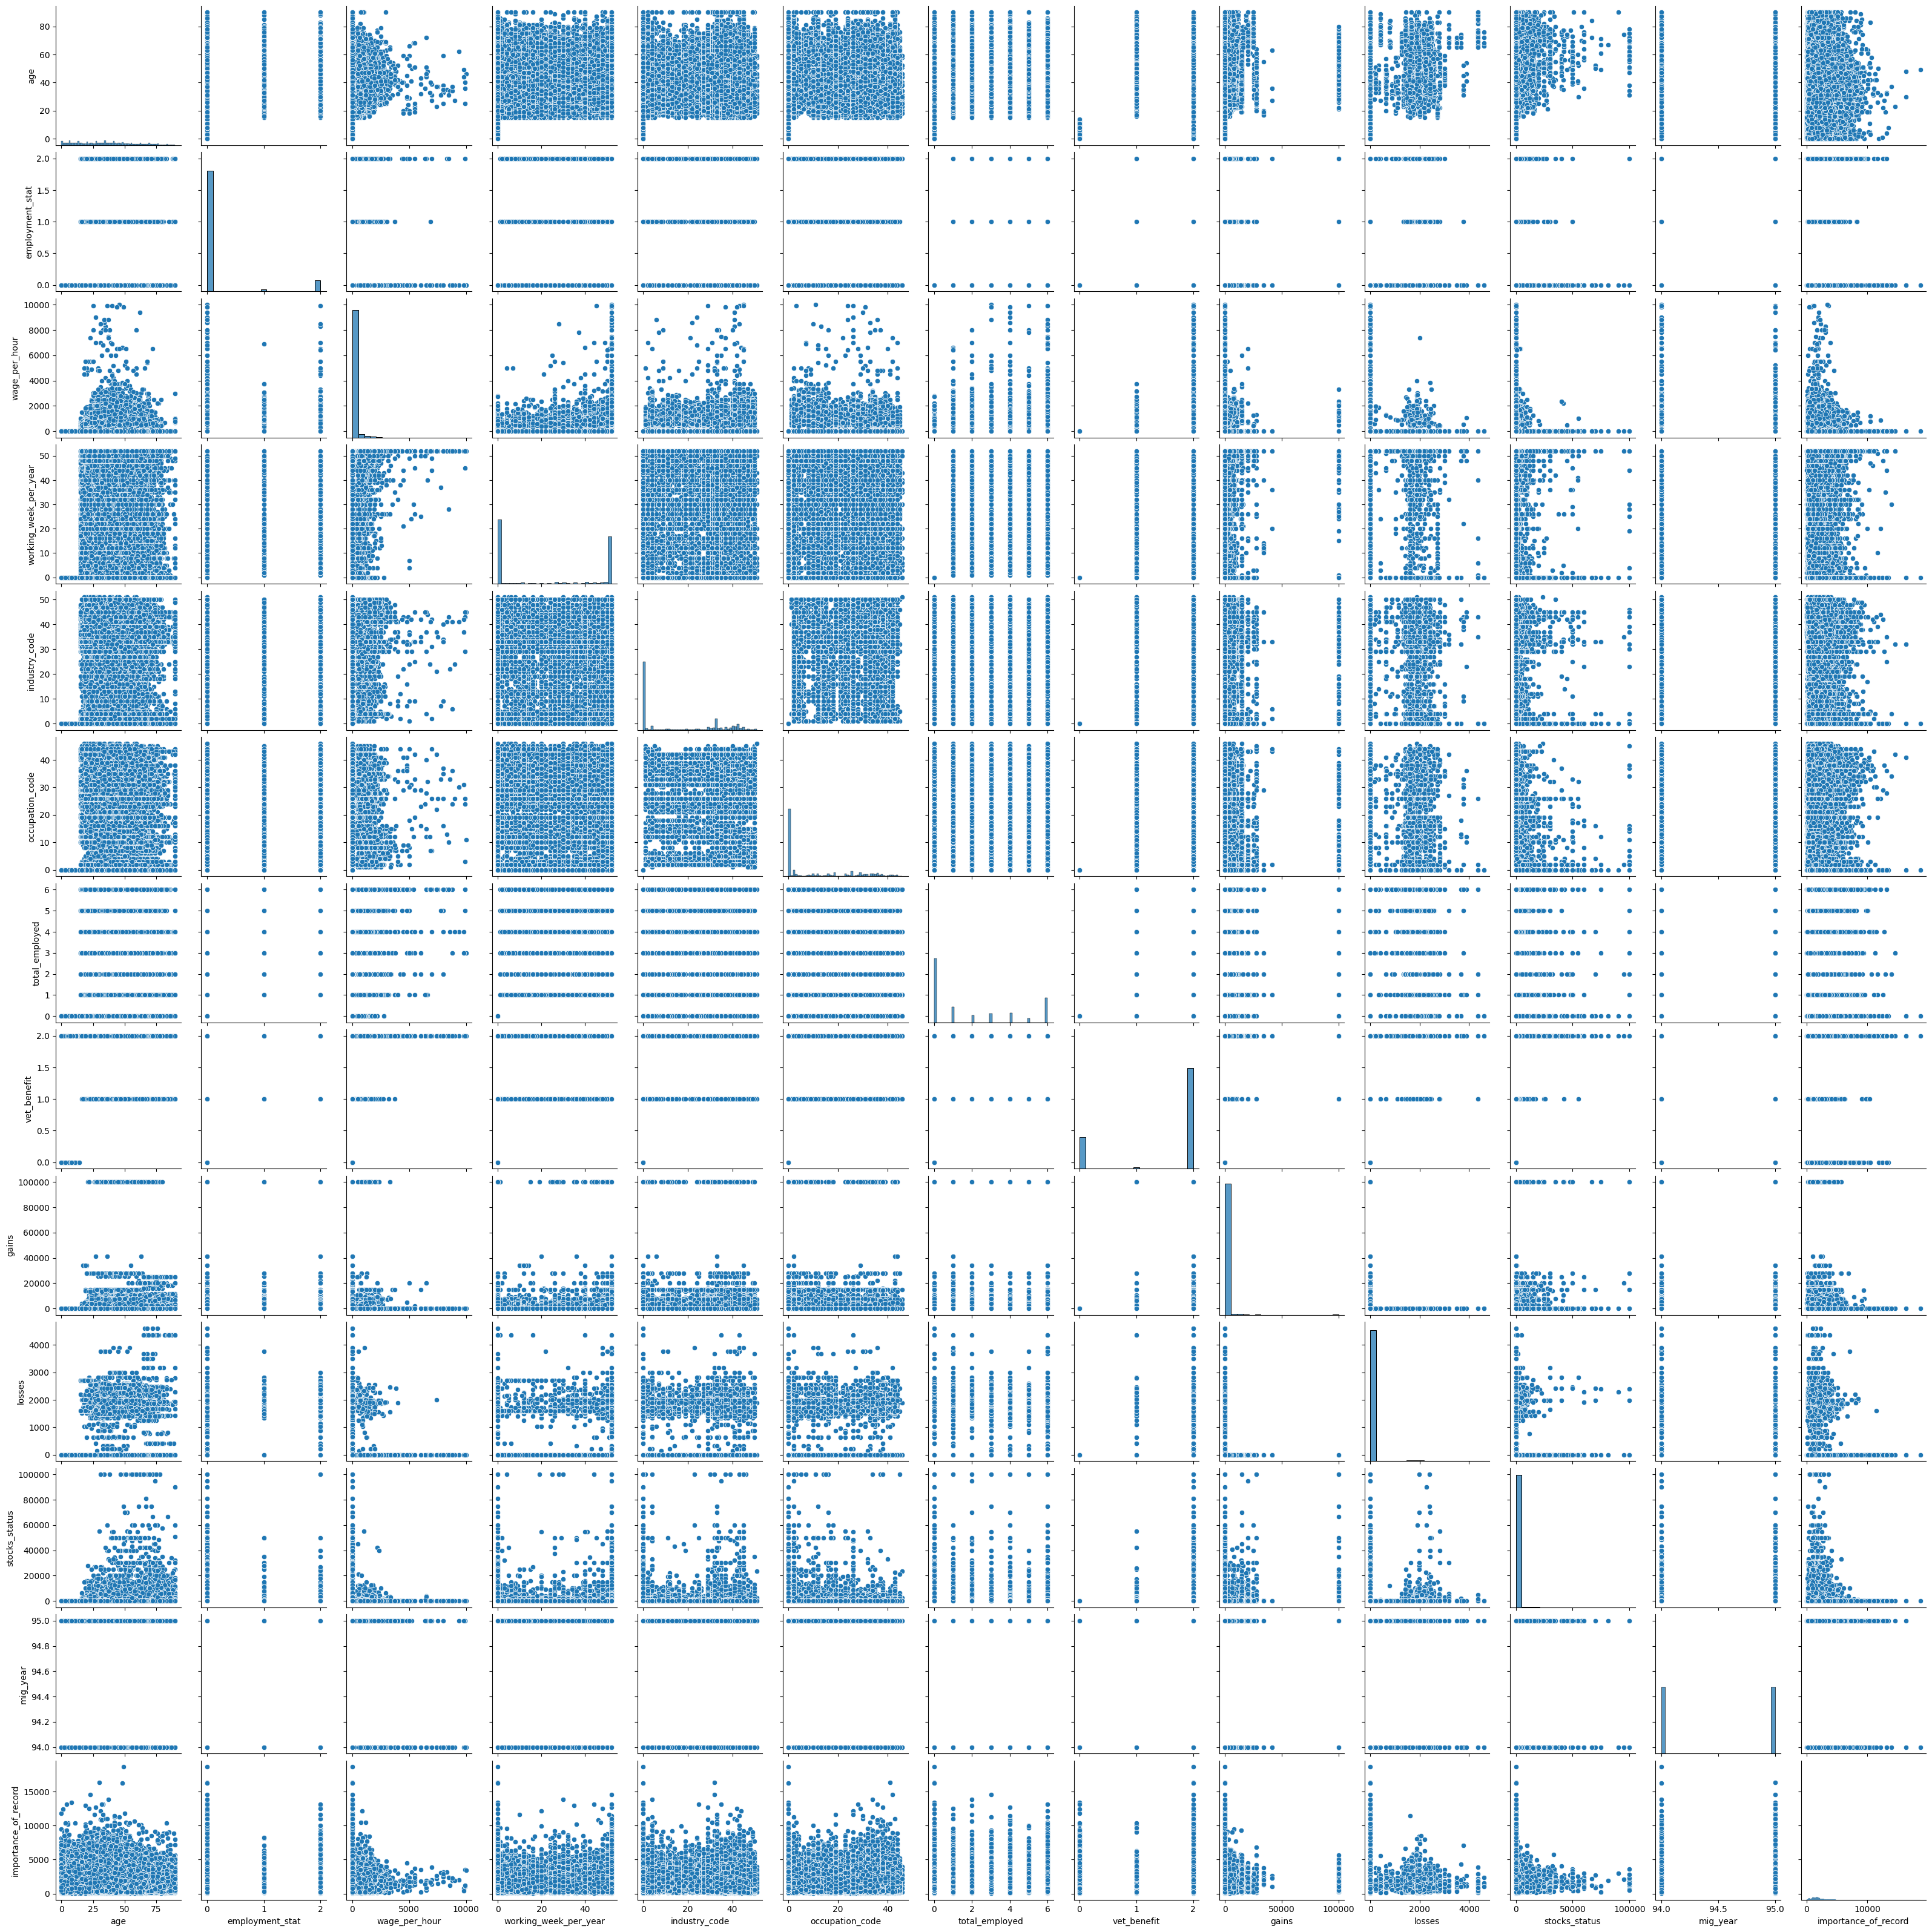

In [19]:
sns.pairplot(data)

In [20]:
data.isnull().sum()

ID                                     0
age                                    0
gender                                 0
education                              0
class                             105245
education_institute               196197
marital_status                         0
race                                   0
is_hispanic                          882
employment_commitment                  0
unemployment_reason               202979
employment_stat                        0
wage_per_hour                          0
is_labor_union                    189420
working_week_per_year                  0
industry_code                          0
industry_code_main                     0
occupation_code                        0
occupation_code_main              105694
total_employed                         0
household_stat                         0
household_summary                      0
under_18_family                   151654
veterans_admin_questionnaire      207415
vet_benefit     

In [21]:
data.duplicated().sum()

0

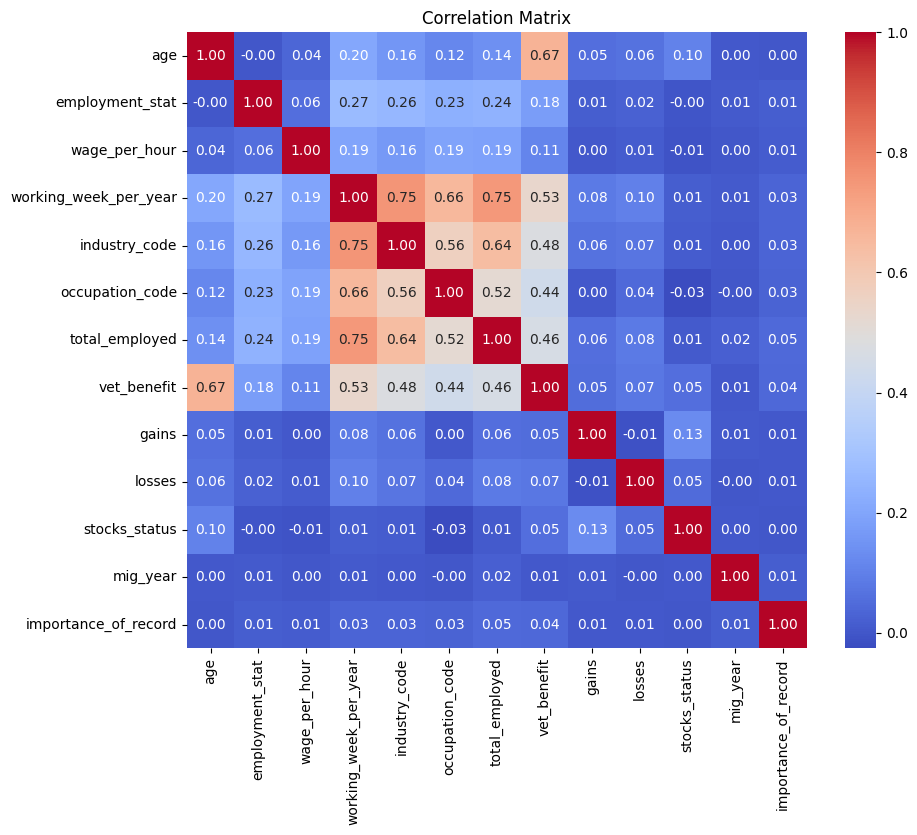

In [22]:
correlation_matrix = data[numerical_variables].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

Heatmap shows no highly corelated columns

#Preprocessing

In [23]:
#Calculating missing value percentage
missing_value_percent = data.isnull().sum() / data.shape[0] * 100
print(missing_value_percent)

ID                                 0.000000
age                                0.000000
gender                             0.000000
education                          0.000000
class                             50.236517
education_institute               93.650566
marital_status                     0.000000
race                               0.000000
is_hispanic                        0.421004
employment_commitment              0.000000
unemployment_reason               96.887813
employment_stat                    0.000000
wage_per_hour                      0.000000
is_labor_union                    90.415706
working_week_per_year              0.000000
industry_code                      0.000000
industry_code_main                 0.000000
occupation_code                    0.000000
occupation_code_main              50.450837
total_employed                     0.000000
household_stat                     0.000000
household_summary                  0.000000
under_18_family                 

**Deleting the column that have missing percentage above 17**

In [24]:
#identifying missing value column names
missing_value_column = missing_value_percent[missing_value_percent > 17].keys()
print(missing_value_column)

Index(['class', 'education_institute', 'unemployment_reason', 'is_labor_union',
       'occupation_code_main', 'under_18_family',
       'veterans_admin_questionnaire', 'migration_prev_sunbelt',
       'residence_1_year_ago', 'old_residence_reg', 'old_residence_state'],
      dtype='object')


In [25]:
#dropping column that contain missing values
data_r_col = data.drop(columns = missing_value_column)

In [26]:
data_r_col.shape

(209499, 32)

**Now dropping the rows that contain null values**

In [27]:
data_r_row= data_r_col.dropna()

In [28]:
data_r_row.shape

(207037, 32)

In [29]:
data_r_row.isnull().sum()

ID                                0
age                               0
gender                            0
education                         0
marital_status                    0
race                              0
is_hispanic                       0
employment_commitment             0
employment_stat                   0
wage_per_hour                     0
working_week_per_year             0
industry_code                     0
industry_code_main                0
occupation_code                   0
total_employed                    0
household_stat                    0
household_summary                 0
vet_benefit                       0
tax_status                        0
gains                             0
losses                            0
stocks_status                     0
citizenship                       0
mig_year                          0
country_of_birth_own              0
country_of_birth_father           0
country_of_birth_mother           0
migration_code_change_in_msa

Now I am going to convert categorical columns into numerical columns!!

In [30]:
categorical_variables = data_r_row.select_dtypes(include='object').columns.tolist()
print(categorical_variables)

['ID', 'gender', 'education', 'marital_status', 'race', 'is_hispanic', 'employment_commitment', 'industry_code_main', 'household_stat', 'household_summary', 'tax_status', 'citizenship', 'country_of_birth_own', 'country_of_birth_father', 'country_of_birth_mother', 'migration_code_change_in_msa', 'migration_code_move_within_reg', 'migration_code_change_in_reg', 'income_above_limit']


In [31]:
pd.set_option('display.max_columns', None)

In [32]:
data_r_row.head()

,ID,age,gender,education,marital_status,race,is_hispanic,employment_commitment,employment_stat,wage_per_hour,working_week_per_year,industry_code,industry_code_main,occupation_code,total_employed,household_stat,household_summary,vet_benefit,tax_status,gains,losses,stocks_status,citizenship,mig_year,country_of_birth_own,country_of_birth_father,country_of_birth_mother,migration_code_change_in_msa,migration_code_move_within_reg,migration_code_change_in_reg,importance_of_record,income_above_limit
0,ID_TZ0000,79,Female,High school graduate,Widowed,White,All other,Not in labor force,0,0,52,0,Not in universe or children,0,2,Householder,Householder,2,Head of household,0,0,292,Native,95,US,US,US,?,?,?,1779.74,Below limit
1,ID_TZ0001,65,Female,High school graduate,Widowed,White,All other,Children or Armed Forces,0,0,0,0,Not in universe or children,0,0,Nonfamily householder,Householder,2,Single,0,0,0,Native,94,US,US,US,unchanged,unchanged,unchanged,2366.75,Below limit
2,ID_TZ0002,21,Male,12th grade no diploma,Never married,Black,All other,Children or Armed Forces,0,500,15,41,Hospital services,26,4,Child 18+ never marr Not in a subfamily,Child 18 or older,2,Single,0,0,0,Native,94,US,US,US,unchanged,unchanged,unchanged,1693.42,Below limit
3,ID_TZ0003,2,Female,Children,Never married,Asian or Pacific Islander,All other,Children or Armed Forces,0,0,0,0,Not in universe or children,0,0,Child <18 never marr not in subfamily,Child under 18 never married,0,Nonfiler,0,0,0,Native,94,US,India,India,unchanged,unchanged,unchanged,1380.27,Below limit
4,ID_TZ0004,70,Male,High school graduate,Married-civilian spouse present,White,All other,Not in labor force,0,0,0,0,Not in universe or children,0,0,Spouse of householder,Spouse of householder,2,Joint both 65+,0,0,0,Native,95,US,US,US,?,?,?,1580.79,Below limit


In [33]:
data=data_r_row

In [34]:
# Selecting only the categorical columns
categorical_columns = ['ID', 'gender', 'education', 'marital_status', 'race', 'is_hispanic', 'employment_commitment',
                       'industry_code_main', 'household_stat', 'household_summary', 'tax_status', 'citizenship',
                       'country_of_birth_own', 'country_of_birth_father', 'country_of_birth_mother', 'migration_code_change_in_msa',
                       'migration_code_move_within_reg', 'migration_code_change_in_reg', 'income_above_limit']

# Subset the data with only the categorical columns
data_categorical = data[categorical_columns]

# Initialize the OneHotEncoder
encoder = OneHotEncoder(sparse=True)

# Fit and transform the data
encoded_data = encoder.fit_transform(data_categorical)

# Creating column names for the encoded data
encoded_column_names = encoder.get_feature_names_out(categorical_columns)

# Creating a DataFrame from the encoded data
encoded_df = pd.DataFrame(encoded_data, columns=encoded_column_names)

# Concatenating the original DataFrame with the encoded DataFrame
data_encoded = pd.concat([data.drop(columns=categorical_columns), encoded_df], axis=1)


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


ValueError: Shape of passed values is (207037, 1), indices imply (207037, 207323)

**Tried One hot encoding but getting errors so going with ordinal encoding**

In [35]:
# Selecting only the categorical columns
categorical_columns = ['ID', 'gender', 'education', 'marital_status', 'race', 'is_hispanic', 'employment_commitment',
                       'industry_code_main', 'household_stat', 'household_summary', 'tax_status', 'citizenship',
                       'country_of_birth_own', 'country_of_birth_father', 'country_of_birth_mother', 'migration_code_change_in_msa',
                       'migration_code_move_within_reg', 'migration_code_change_in_reg', 'income_above_limit']

# Subset the data with only the categorical columns
data_categorical = data[categorical_columns]

# Initialize the OrdinalEncoder
encoder = OrdinalEncoder()

# Fit and transform the data
encoded_data = encoder.fit_transform(data_categorical)

# Creating column names for the encoded data
encoded_column_names = ['{}_encoded'.format(col) for col in categorical_columns]

# Creating a DataFrame from the encoded data
encoded_df = pd.DataFrame(encoded_data, columns=encoded_column_names)

# Concatenating the original DataFrame with the encoded DataFrame
data_encoded = pd.concat([data.drop(columns=categorical_columns), encoded_df], axis=1)


In [38]:
data_encoded.head()

,age,employment_stat,wage_per_hour,working_week_per_year,industry_code,occupation_code,total_employed,vet_benefit,gains,losses,stocks_status,mig_year,importance_of_record,ID_encoded,gender_encoded,education_encoded,marital_status_encoded,race_encoded,is_hispanic_encoded,employment_commitment_encoded,industry_code_main_encoded,household_stat_encoded,household_summary_encoded,tax_status_encoded,citizenship_encoded,country_of_birth_own_encoded,country_of_birth_father_encoded,country_of_birth_mother_encoded,migration_code_change_in_msa_encoded,migration_code_move_within_reg_encoded,migration_code_change_in_reg_encoded,income_above_limit_encoded
0,79.0,0.0,0.0,52.0,0.0,0.0,2.0,2.0,0.0,0.0,292.0,95.0,1779.74,0.0,0.0,12.0,6.0,4.0,0.0,2.0,14.0,20.0,4.0,0.0,2.0,40.0,40.0,40.0,0.0,0.0,0.0,1.0
1,65.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,94.0,2366.75,1.0,0.0,12.0,6.0,4.0,0.0,0.0,14.0,22.0,4.0,5.0,2.0,40.0,40.0,40.0,8.0,8.0,7.0,1.0
2,21.0,0.0,500.0,15.0,41.0,26.0,4.0,2.0,0.0,0.0,0.0,94.0,1693.42,2.0,1.0,2.0,4.0,2.0,0.0,0.0,9.0,2.0,0.0,5.0,2.0,40.0,40.0,40.0,8.0,8.0,7.0,1.0
3,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,94.0,1380.27,3.0,0.0,10.0,4.0,1.0,0.0,0.0,14.0,8.0,2.0,4.0,2.0,40.0,19.0,19.0,8.0,8.0,7.0,1.0
4,70.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,95.0,1580.79,4.0,1.0,12.0,2.0,4.0,0.0,2.0,14.0,37.0,7.0,1.0,2.0,40.0,40.0,40.0,0.0,0.0,0.0,1.0


In [44]:
data_encoded.isnull().sum()

age                                       2429
employment_stat                           2429
wage_per_hour                             2429
working_week_per_year                     2429
industry_code                             2429
occupation_code                           2429
total_employed                            2429
vet_benefit                               2429
gains                                     2429
losses                                    2429
stocks_status                             2429
mig_year                                  2429
importance_of_record                      2429
ID_encoded                                2429
gender_encoded                            2429
education_encoded                         2429
marital_status_encoded                    2429
race_encoded                              2429
is_hispanic_encoded                       2429
employment_commitment_encoded             2429
industry_code_main_encoded                2429
household_sta

In [45]:
data_encoded.shape

(209466, 32)

In [46]:
data_encoded= data_encoded.dropna()

In [47]:
data_encoded.shape

(204608, 32)

In [48]:
data_encoded.isnull().sum()

age                                       0
employment_stat                           0
wage_per_hour                             0
working_week_per_year                     0
industry_code                             0
occupation_code                           0
total_employed                            0
vet_benefit                               0
gains                                     0
losses                                    0
stocks_status                             0
mig_year                                  0
importance_of_record                      0
ID_encoded                                0
gender_encoded                            0
education_encoded                         0
marital_status_encoded                    0
race_encoded                              0
is_hispanic_encoded                       0
employment_commitment_encoded             0
industry_code_main_encoded                0
household_stat_encoded                    0
household_summary_encoded       

As missing values has been handeled and  all the data is converted into numerical form so now it's time for model training.

#Baseline Modeling

In [49]:
# Assuming 'target' is your target variable
X = data_encoded.drop(columns=['income_above_limit_encoded'])
y = data_encoded['income_above_limit_encoded']

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Random Forest classifier with class_weight='balanced' to handle class imbalance
rf_classifier = RandomForestClassifier(n_estimators=100, class_weight='balanced', random_state=42)

# Fitting the classifier to the training data
rf_classifier.fit(X_train, y_train)

# Predicting on the testing data
y_pred = rf_classifier.predict(X_test)

# Calculating the F1 score of the model
f1 = f1_score(y_test, y_pred)
print("F1 Score:", f1)


F1 Score: 0.9693767385146892


In [51]:
# Assuming 'target' is your target variable
X = data_encoded.drop(columns=['income_above_limit_encoded'])
y = data_encoded['income_above_limit_encoded']

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the HistGradientBoostingClassifier
hgbc_classifier = HistGradientBoostingClassifier(random_state=42)

# Fitting the classifier to the training data
hgbc_classifier.fit(X_train, y_train)

# Predicting on the testing data
y_pred = hgbc_classifier.predict(X_test)

# Calculating the F1 score of the model
f1 = f1_score(y_test, y_pred)
print("F1 Score:", f1)


F1 Score: 0.9710574002705393


**As F1 score of both model indicates model are good to go with high accuraccy.**

# **Well a lot of things can be done on this but submitting this notebook here on short notice as our metric for evaluation F1 metric meet.**